In [24]:
def load_input(file_path: str) -> [str]:
    with open(file_path) as f:
        return f.read().splitlines() 

In [25]:
# part 1

def solve_part_1(input_data: [str]) -> int:
    bag = {"red": 12, "green": 13, "blue": 14}
    return sum(process_game(game, bag) for game in input_data)

def process_game(game: str, bag: dict) -> int:
    game_id, sets = split_game_and_sets(game)
    if game_is_possible(bag, sets):
        return game_id
    else:
        return 0

def split_game_and_sets(game: str) -> (int, [str]):
    game_num, sets = game.split(": ")
    game_id = int(game_num.split(" ")[-1])
    sets = sets.split("; ")
    return game_id, sets

def game_is_possible(bag: dict, sets: [str]) -> bool:
    return all(set_is_possible(bag, set) for set in sets)

def set_is_possible(bag: dict, set: str) -> bool:
    for cubes in set.split(", "):
        count, color = cubes.split(" ")
        if bag[color] < int(count):
            return False
    return True

# Example
example_input = load_input('example1.txt')
answer = solve_part_1(example_input)
print(answer)

8


In [26]:
input_data = load_input('input.txt')
answer = solve_part_1(input_data)
print(answer)

2727


In [27]:
# part 2

def solve_part_2(input_data: [str]) -> int:
    return sum(game_power(game) for game in input_data)

def game_power(game: str) -> (int, int, int):
    cube_max = {"red": 0, "green": 0, "blue": 0}
    _, sets = split_game_and_sets(game)
    for set in sets:
        for cubes in set.split(", "):
            count, color = cubes.split(" ")
            cube_max[color] = max(cube_max[color], int(count))
    return cube_max["red"] * cube_max["green"] * cube_max["blue"]
    
# Example
example_input = load_input('example1.txt')
answer = solve_part_2(example_input)
print(answer)

2286


In [28]:
input_data = load_input('input.txt')
answer = solve_part_2(input_data)
print(answer)

56580


1 100


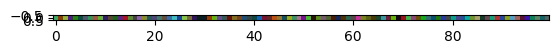

2 50


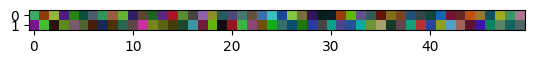

4 25


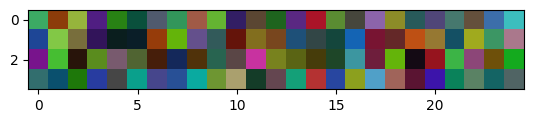

5 20


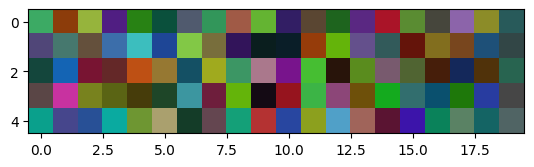

10 10


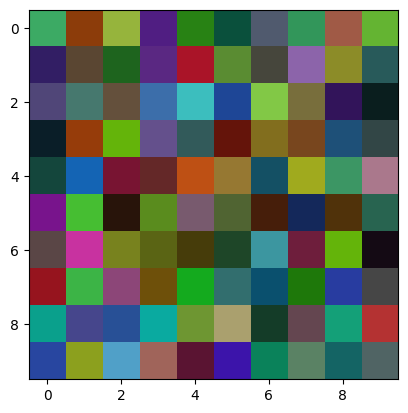

20 5


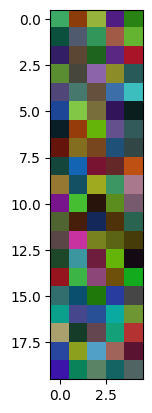

25 4


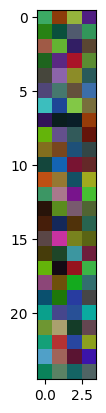

50 2


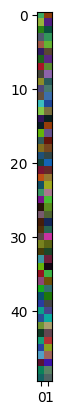

100 1


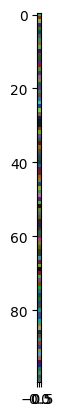

In [48]:
import numpy as np
import matplotlib.pyplot as plt


def pixel_color(game: str) -> (int, int, int):
    cube_max = {"red": 0, "green": 0, "blue": 0}
    _, sets = split_game_and_sets(game)
    for set in sets:
        for cubes in set.split(", "):
            count, color = cubes.split(" ")
            cube_max[color] = max(cube_max[color], int(count))
    return cube_max["red"], cube_max["green"], cube_max["blue"]

pixels = np.array([pixel_color(game) for game in input_data])
pixels *= 10 

def show_image(pixels: [(int, int, int)], shape: (int, int, int)):
    pixels = pixels.reshape(shape)
    plt.imshow(pixels)
    plt.show()

# get all factors of 100
factors = []
for i in range(1, 101):
    if 100 % i == 0:
        factors.append(i)
# get all combinations of factors that multiply to 100
combinations = []
for i in factors:
    for j in factors:
        if i * j == 100:
            print(i, j)
            show_image(pixels, (i, j, 3))



457
1 457


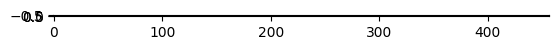

457 1


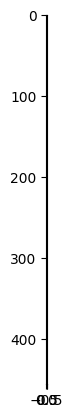

In [54]:
import numpy as np
import matplotlib.pyplot as plt


def get_pixels(game: str) -> [(int, int, int)]:
    _, sets = split_game_and_sets(game)
    data = []
    for set in sets:
        pix = {"red": 0, "green": 0, "blue": 0}
        for cubes in set.split(", "):
            count, color = cubes.split(" ")
            pix[color] = int(count)
        data.append((pix["red"], pix["green"], pix["blue"]))
    return data

pixels = []
for game in input_data:
    pixels += get_pixels(game)

pixels = np.array(pixels)
pixels *= 10

print(len(pixels))

def show_image(pixels: [(int, int, int)], shape: (int, int, int)):
    pixels = pixels.reshape(shape)
    plt.imshow(pixels)
    plt.show()

# get all factors of 100
factors = []
for i in range(1, len(pixels) + 1):
    if len(pixels) % i == 0:
        factors.append(i)
# get all combinations of factors that multiply to 100
combinations = []
for i in factors:
    for j in factors:
        if i * j == len(pixels):
            print(i, j)
            show_image(pixels, (i, j, 3))